In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [31]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import numpy as np
import keras
if keras.backend.image_dim_ordering() != 'th':
        keras.backend.set_image_dim_ordering('th')

def VGG_16(weights_path=None):
    

    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model



In [32]:
# Test pretrained model
model = VGG_16('/u/ambrish/models/VGG_16/vgg16_weights.h5')
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

In [3]:
from utils import *
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=None,
        width_shift_range=None,
        height_shift_range=None,
        horizontal_flip=False,
        vertical_flip=False)

In [4]:
gen_ = datagen.flow_from_directory('/dccstor/dlw/data/imagenet/train/',batch_size=2, shuffle=False,target_size = (224,224))
def wrapper_datagen():
    while 1:
        x,y = gen_.__next__()
        '''
        bgr: 103.939, 116.779, 123.68
        '''
        print(x.shape)
        #x[:,:,0] -= 123.68
        #x[:,:,1] -= 116.779
        #x[:,:,2] -= 103.939
        #if keras.backend.image_dim_ordering() == 'th':
            #x = x.transpose((0,3,1,2))
        #nimg, ch, h, w = x.shape[0], x.shape[3], x.shape[1], x.shape[2]
        #x = np.rollaxis(x, 2, 1).reshape(nimg, ch, h, w)
        
        yield x,y

Found 14269 images belonging to 1000 classes.


In [5]:
x, y = wrapper_datagen().__next__()


(2, 224, 224, 3)


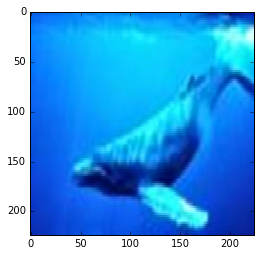

In [14]:
plt.imshow(x[0]/255)

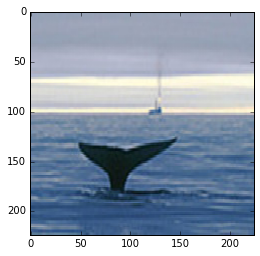

In [15]:
plt.imshow(x[1]/255)

In [35]:
first_ = x[0]
second_ = x[1]

In [36]:
first_ = first_[...,[2,1,0]]
second_ = second_[...,[2,1,0]]

In [37]:
def tra_(im):
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    return im/255

In [38]:
first_ = tra_(first_)
second_ = tra_(second_)

In [39]:
out1= model.predict(first_)
print(np.argmax(out1))
out2= model.predict(second_)
print(np.argmax(out2))

669
669


In [27]:
np.argmax(y_pred,axis=1)

array([980, 896, 467,   5, 115, 755, 395, 395, 562, 103, 148, 147,  49,
       111,  49, 210, 337, 148, 930, 344, 128, 103, 977, 913, 814, 147,
       977, 147, 905, 977, 930, 619])

In [ ]:
if keras.backend.image_dim_ordering() == 'th':
    nimg, ch, h, w = img.shape[0], img.shape[3], img.shape[1], img.shape[2]
    img = np.rollaxis(img, 2, 1).reshape(nimg, ch, h, w)
if __name__ == "__main__":
    im = cv2.resize(cv2.imread('cat.jpg'), (224, 224)).astype(np.float32)
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)

    # Test pretrained model
    model = VGG_16('vgg16_weights.h5')
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy')
    out = model.predict(im)
    print np.argmax(out)

In [ ]:
from scipy.io import loadmat
meta = loadmat('ILSVRC2012_devkit_t12/data/meta.mat')
syn = meta['synsets']

for i in range(1000):                                                                                       
    wnid = syn['WNID'][i][0][0]                      
    os.system('mkdir train/'+wnid)

with open('wnids.txt','w') as csvfile:                                                                      
    writer = csv.writer(csvfile)                     
    for i in range(1000):                                                                                   
        wnid = syn['WNID'][i][0]            
        writer.writerow(wnid)
        
for i in range(10):                                                                                         
    wnid = syn['WNID'][i][0][0]                      
    #os.system('python scripts/imagenet_download.py '+wnid+' -W 224 -H 224 -dst /dccstor/dlw/data/imagenet/train/')
